In [1]:
from verticox.aggregator import Lz, group_samples_at_risk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
NUM_SAMPLES = 2 # If we want a 2 dimensional input space we need to stick to 2 samples
MIN = -1.0
MAX = 1.0
STEP_SIZE = 0.01
WIDTH = int((MAX - MIN)//STEP_SIZE) + 1

RESOLUTION = (WIDTH, WIDTH)
RESOLUTION
PARTIAL_DERIVATIVE_IDX = 0

In [3]:
K =1
gamma = np.arange(NUM_SAMPLES)
sigma = gamma
rho = 0.25
events = [1,2]
Rt = group_samples_at_risk(events, None)

Rt

{1: array([0, 1]), 2: array([1])}

In [4]:
def apply_func(f):
    result = np.zeros(RESOLUTION)

    for idx_1, z_1 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
        for idx_2, z_2 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
            z = np.array([z_1, z_2])

            result[idx_1, idx_2] = f(z)
        
    return result


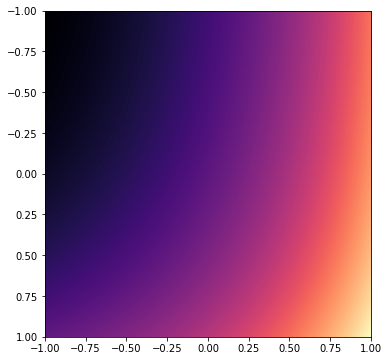

In [5]:
f = lambda z: Lz.parametrized(z, K, gamma, sigma, rho, Rt)

result = apply_func(f)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result, extent=[MIN, MAX, MAX, MIN], cmap='magma')

array([[0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542],
       [0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542],
       [0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542],
       ...,
       [0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542],
       [0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542],
       [0.0223015 , 0.02247513, 0.02265026, ..., 0.11740444, 0.11848463,
        0.11957542]])

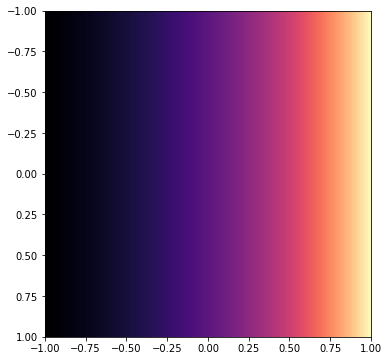

In [6]:
diff = np.diff(result, axis=1)
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(diff, extent=[MIN, MAX, MAX, MIN], cmap='magma')
diff

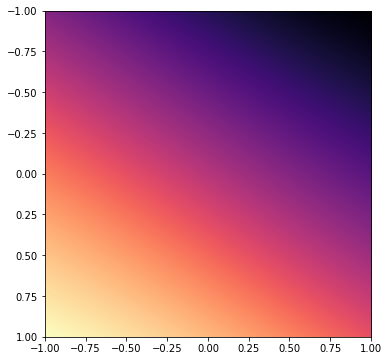

In [7]:
derivative_1 = lambda z: Lz.derivative_1_parametrized(z, K, gamma, sigma, rho, Rt, PARTIAL_DERIVATIVE_IDX, events)

result = apply_func(derivative_1)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result, extent=[MIN, MAX, MAX, MIN], cmap='magma')

It doesn't look the same.

Let's try a dataset with only one sample

In [8]:
NUM_SAMPLES = 1
K =1
gamma = np.arange(NUM_SAMPLES)
sigma = gamma
rho = 0.25
events = [1]
Rt = group_samples_at_risk(events, None)

Rt

{1: array([0])}

Text(0.5, 1.0, 'np.diff')

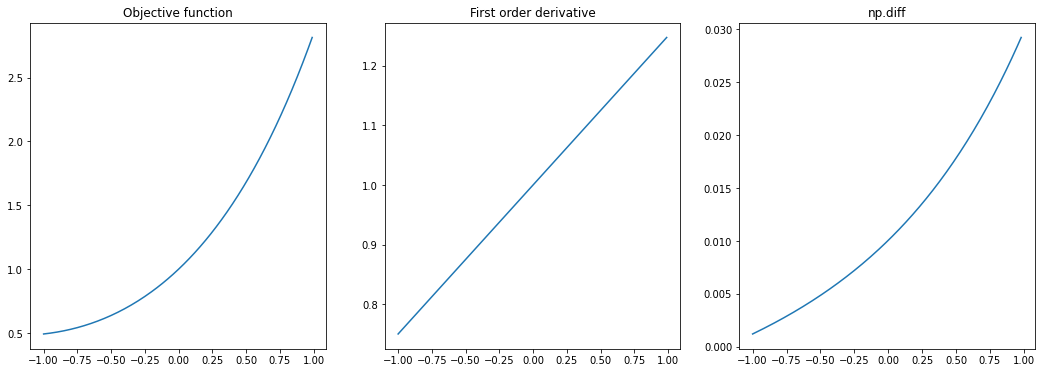

In [9]:
z_values = np.arange(MIN, MAX, STEP_SIZE)

def apply_onedim(f, x):
    result = np.zeros(x.shape)

    for idx, z in enumerate(z_values):
        result[idx] = f(np.array([z]))
    return result

f_result = apply_onedim(f, z_values)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.plot(z_values, f_result)
ax1.set_title('Objective function')

ax2.plot(z_values, apply_onedim(derivative_1, z_values))
ax2.set_title('First order derivative')

ax3.plot(z_values[:-1], np.diff(f_result))
ax3.set_title('np.diff')



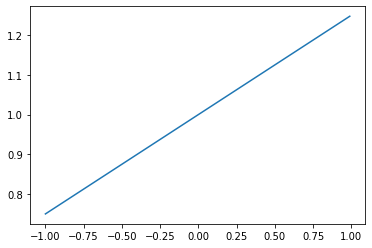

In [23]:
d1_result = np.zeros(WIDTH)
z_values = np.arange(MIN, MAX, STEP_SIZE)
for idx, z in enumerate(z_values):
    d1_result[idx] = derivative_1(np.array([z]))

plt.plot(z_values, d1_result)

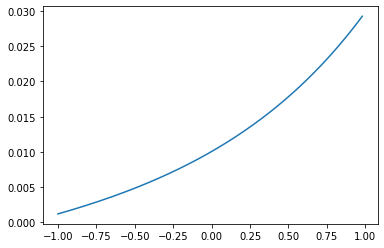

In [24]:
diff_result = np.diff(result)
z_values = np.arange(MIN, MAX, STEP_SIZE)

plt.plot(z_values[:-1], diff_result)